## Setup for AWS notebook -- upgrade tensorflow <a class="anchor" id="setup"></a>
The AWS notebook conda_tensorflow2_p36 comes with Tensorflow 2.1.0. 

To get required functionality, upgrade to at least 2.3.0.

In [2]:
pip install --upgrade tensorflow==2.3.0

     |█████████████████████████████▍  | 293.9 MB 98.6 MB/s eta 0:00:01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 320.4 MB 32 kB/s              
     |████████████████████████████████| 5.8 MB 72.4 MB/s            
     |████████████████████████████████| 459 kB 126.4 MB/s            
     |████████████████████████████████| 26.1 MB 63.6 MB/s            
     |████████████████████████████████| 42 kB 2.8 MB/s             
     |████████████████████████████████| 4.9 MB 108.0 MB/s            
     |████████████████████████████████| 781 kB 80.2 MB/s            
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.3
    Uninstalling scipy-1.5.3:
      Successfully uninstall

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-serving-api 2.1.0 requires tensorflow~=2.1.0, but you have tensorflow 2.3.0 which is incompatible.
tensorflow-gpu 2.1.3 requires gast==0.2.2, but you have gast 0.3.3 which is incompatible.
tensorflow-gpu 2.1.3 requires keras-preprocessing==1.1.0, but you have keras-preprocessing 1.1.2 which is incompatible.
tensorflow-gpu 2.1.3 requires tensorboard<2.2.0,>=2.1.0, but you have tensorboard 2.8.0 which is incompatible.
tensorflow-gpu 2.1.3 requires tensorflow-estimator<2.2.0,>=2.1.0rc0, but you have tensorflow-estimator 2.3.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


### NEED TO RESTART KERNEL AFTER UPDATE!!!

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
print(tf.__version__)

2.3.0


In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# Training summary
We first tried several different types of architectures: 
1. ResNet50
2. VGG16
3. EfficientNetB4

The best performing architecture seems to be EfficientNetB4.

As the next step we continue with EfficientNet and experiment with
1. adding additional 4000 examples of malignant images to the training data for balancing
2. data augmentation
3. learning rate

## ResNet

In [ ]:
%run train.py --enet-type ResNet --n-epochs 5 --img-width 256 --img-height 256

## VGG16 

In [ ]:
%run train.py --enet-type VGG16 --n-epochs 5

## EfficientNetB4 

<TakeDataset shapes: (((None, 256, 256, 3), (None, 3)), (None,)), types: ((tf.float32, tf.int64), tf.int64)>
Datasets loaded...
Architecture: EfficientNet

Train examples: 33126
Number of malignant: 584
Number of benign: 32542
Class weights: {0: 0.5089730194825148, 1: 28.36130136986301}

Epoch 1/30
3271/3270 [==============================] - 202s 62ms/step - loss: 0.7787 - AUC: 0.6811 - accuracy: 0.6488 - precision: 0.0314 - recall: 0.6293 - F1: 0.6293 - val_loss: 0.7100 - val_AUC: 0.7468 - val_accuracy: 0.5826 - val_precision: 0.0302 - val_recall: 0.7179 - val_F1: 0.7179
Epoch 2/30
3271/3270 [==============================] - 199s 61ms/step - loss: 0.6230 - AUC: 0.7577 - accuracy: 0.6955 - precision: 0.0396 - recall: 0.6931 - F1: 0.6931 - val_loss: 0.4589 - val_AUC: 0.8146 - val_accuracy: 0.8052 - val_precision: 0.0575 - val_recall: 0.6410 - val_F1: 0.6410
Epoch 3/30
3271/3270 [==============================] - 195s 60ms/step - loss: 0.6314 - AUC: 0.7711 - accuracy: 0.7147 - precisio

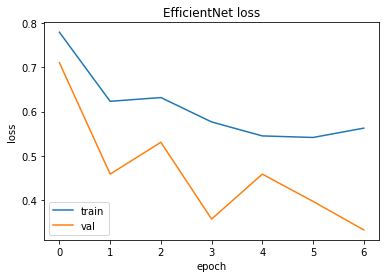

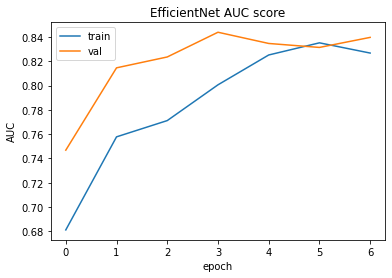

In [1]:
# Efficient Net B4
%run train.py --enet-type EfficientNet --n-epochs 30 

## EfficientNetB4 with image augmentation

Architecture: EfficientNet
Using augmentation: True
Using hair augmentation: True
Add malignant-only images: False

<TakeDataset shapes: (((None, 256, 256, 3), (None, 3)), (None,)), types: ((tf.float32, tf.int64), tf.int64)>
Datasets loaded...
Train examples: 33126
Number of malignant: 584
Number of benign: 32542
Class weights: {0: 0.5089730194825148, 1: 28.36130136986301}

Epoch 1/20
1636/1635 [==============================] - 186s 114ms/step - loss: 0.6853 - AUC: 0.6959 - accuracy: 0.6727 - precision: 0.0336 - recall: 0.6266 - F1: 0.6266 - val_loss: 0.5608 - val_AUC: 0.7854 - val_accuracy: 0.7026 - val_precision: 0.0412 - val_recall: 0.7009 - val_F1: 0.7009
Epoch 2/20
1636/1635 [==============================] - 183s 112ms/step - loss: 0.5838 - AUC: 0.7787 - accuracy: 0.7200 - precision: 0.0436 - recall: 0.7039 - F1: 0.7039 - val_loss: 0.3575 - val_AUC: 0.8197 - val_accuracy: 0.8732 - val_precision: 0.0732 - val_recall: 0.5214 - val_F1: 0.5214
Epoch 3/20
1636/1635 [=================

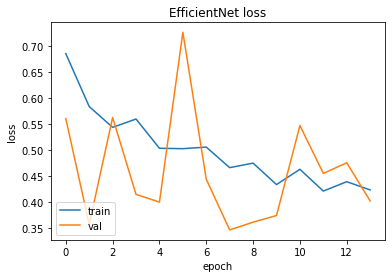

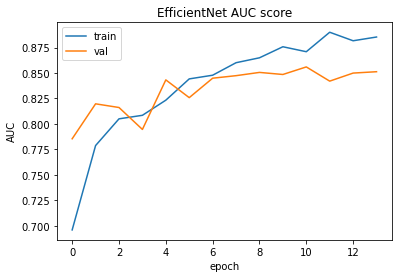

In [1]:
# rerun with augmentation and hair augmentation
%run train.py --enet-type EfficientNet --n-epochs 20 --augment --hair-augment 

## EfficientNetB4 with additional malignant data

Architecture: EfficientNet
Using augmentation: True
Using hair augmentation: True
Add malignant-only images: True

<TakeDataset shapes: (((None, 256, 256, 3), (None, 3)), (None,)), types: ((tf.float32, tf.int64), tf.int64)>
Datasets loaded...
Train examples: 37102
Number of malignant: 4560
Number of benign: 32542
Class weights: {0: 0.570063302808678, 1: 4.068201754385965}

Epoch 1/20
1883/1882 [==============================] - 218s 116ms/step - loss: 0.4559 - AUC: 0.8901 - accuracy: 0.7972 - precision: 0.4124 - recall: 0.8249 - F1: 0.8249 - val_loss: 0.6284 - val_AUC: 0.8528 - val_accuracy: 0.7106 - val_precision: 0.0484 - val_recall: 0.8120 - val_F1: 0.8120
Epoch 2/20
1883/1882 [==============================] - 216s 115ms/step - loss: 0.3799 - AUC: 0.9233 - accuracy: 0.8301 - precision: 0.4599 - recall: 0.8517 - F1: 0.8517 - val_loss: 0.4165 - val_AUC: 0.8654 - val_accuracy: 0.8063 - val_precision: 0.0671 - val_recall: 0.7607 - val_F1: 0.7607
Epoch 3/20
1883/1882 [==================

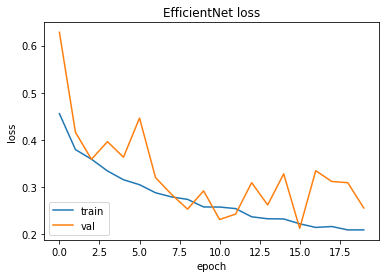

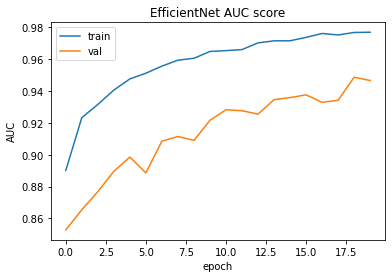

In [1]:
# rerun with augmentation, hair augmentation, additional malignant data

%run train.py --enet-type EfficientNet --n-epochs 20 --augment --hair-augment --add-malig

## EfficientNet with learning rate scheduler

Architecture: EfficientNet
Using augmentation: True
Using hair augmentation: True
Add malignant-only images: True

<TakeDataset shapes: (((None, 256, 256, 3), (None, 3)), (None,)), types: ((tf.float32, tf.int64), tf.int64)>
Datasets loaded...
71688192/71686520 [==============================] - 2s 0us/step
Train examples: 37102
Number of malignant: 4560
Number of benign: 32542
Class weights: {0: 0.570063302808678, 1: 4.068201754385965}

Epoch 1/20
1883/1882 [==============================] - 219s 116ms/step - loss: 0.6724 - AUC: 0.7273 - accuracy: 0.6057 - precision: 0.2444 - recall: 0.7344 - F1: 0.7344 - val_loss: 0.6396 - val_AUC: 0.7494 - val_accuracy: 0.6443 - val_precision: 0.0362 - val_recall: 0.7350 - val_F1: 0.7350
Epoch 2/20
1883/1882 [==============================] - 219s 116ms/step - loss: 0.5486 - AUC: 0.8278 - accuracy: 0.7350 - precision: 0.3258 - recall: 0.7716 - F1: 0.7716 - val_loss: 0.5505 - val_AUC: 0.7782 - val_accuracy: 0.7320 - val_precision: 0.0456 - val_recall:

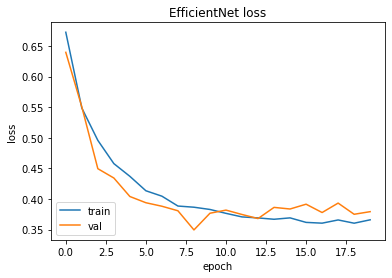

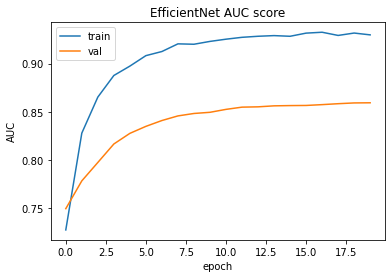

In [2]:
# rerun with augmentation, hair augmentation, additional malignant data and learning rate scheduler

%run train.py --enet-type EfficientNet --n-epochs 20 --augment --hair-augment --add-malig

# Predict

In [1]:
# Predict best-AUC model on test data and save predictions.
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

%run predict.py --enet-type EfficientNet_aug_hair_aug_add_malig

UNLABELLED
[0.50568593]


409it [00:54,  7.44it/s]


Predictions saved to 'results/predictions/predictions-valid-EfficientNet_aug_hair_aug_add_malig.csv'.


In [ ]:
%run predict.py --enet-type EfficientNet

# Evaluate

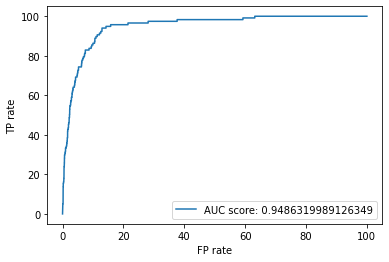

Optimal threshold: 0.4720709323883057
sum_labels 0.07885469300260298

Confusion matrix:
[[5990  424]
 [  26   91]]

AUC score: 0.9486319989126349

Accuracy: 0.9310978410656867

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      6414
           1       0.18      0.78      0.29       117

    accuracy                           0.93      6531
   macro avg       0.59      0.86      0.63      6531
weighted avg       0.98      0.93      0.95      6531



In [1]:
%run evaluate.py --enet-type EfficientNet_aug_hair_aug_add_malig

### Version checking

In [2]:

import tensorflow, sklearn, pandas, numpy, re, matplotlib

print("tensorflow==" + tensorflow.__version__)
print("sklearn==" + sklearn.__version__)
print("pandas==" + pandas.__version__)
print("numpy==" + numpy.__version__)
print("re==" + re.__version__)
print("matplotlib==" + matplotlib.__version__)


tensorflow==2.3.0
sklearn==0.24.1
pandas==1.1.5
numpy==1.18.5
re==2.2.1
matplotlib==3.3.4
